In [0]:
# example of a multilayer perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.recurrent import LSTM

import matplotlib.pyplot as plt

from numpy import clip
from numpy import asarray

Using TensorFlow backend.


## Multilayer Perceptron

We define a Multilayer Perceptron model for binary classification.

In [0]:
# Model architecture
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible) 
hidden2 = Dense(20, activation='relu')(hidden1) 
hidden3 = Dense(10, activation='relu')(hidden2) 
output = Dense(1, activation='sigmoid')(hidden3) 
model = Model(inputs=visible, outputs=output)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# summarize layers
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [0]:
# check PIL and Pillow version numbers
import PIL
from PIL import Image
print('Pillow Version:', PIL.__version__) 
print('PIL Version:', PIL.VERSION)

Pillow Version: 4.1.1
PIL Version: 1.1.7


In [0]:
# plot model graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

In [0]:
!curl -O https://www.travelsavvygal.com/wp-content/uploads/2017/05/Featured-Opera-House-Sydney-Australia-DSC_0630-1038x576.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  168k  100  168k    0     0   314k      0 --:--:-- --:--:-- --:--:--  314k


In [0]:
!mv Featured-Opera-House-Sydney-Australia-DSC_0630-1038x576.jpg opera_house.jpg

In [0]:
# load the image
filename= 'opera_house.jpg'
image = Image.open(filename)

In [0]:
# summarize some details about the image 
print(image.format)
print(image.mode)
print(image.size)

JPEG
RGB
(1038, 576)


In [0]:
# show the image
image.show()

In [0]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot

# load image as pixel array
data = image.imread('opera_house.jpg')

In [0]:
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)

uint8
(576, 1038, 3)


In [0]:
# display the array of pixels as an image pyplot.imshow(data)
pyplot.show()

### Convert Images to NumPy Arrays and Back

Running the example first loads the photo as a Pillow image then converts it to a NumPy array and reports the shape of the array. Finally, the array is converted back into a Pillow image and the details are reported.

In [0]:
from PIL import Image

In [0]:
# load the image
image = Image.open('opera_house.jpg')

In [0]:
# convert image to numpy array
data = asarray(image)

In [0]:
# summarize shape
print(data.shape)

(576, 1038, 3)


In [0]:
# create Pillow image
image2 = Image.fromarray(data)

In [0]:
# summarize image details 
print(image2.format) 
print(image2.mode) 
print(image2.size)

None
RGB
(1038, 576)


In [0]:
# load all images in a directory
from os import listdir
from matplotlib import image

In [0]:
# load all images in a directory loaded_images = list()
for filename in listdir('images'):
  # load image
  img_data = image.imread('images/' + filename)

  # store loaded image
  loaded_images.append(img_data)
  print('> loaded %s %s '% (filename, img_data.shape))

### Save Images to File

In [0]:
# save as PNG format 
from PIL import Image

# load the image
image = Image.open('opera_house.jpg')

# save as PNG format 
image.save('opera_house.png', format='PNG') 

# load the image again and inspect the format 
image2 = Image.open('opera_house.png') 
print(image2.format)

PNG


Running the example below loads the photograph, converts it to grayscale, saves the image in a new file, then loads it again and shows it to confirm that the photo is now grayscale instead of color.

In [0]:
# convert the image to grayscale
gs_image = image.convert(mode='L')

# save in jpeg format 
gs_image.save('opera_house_grayscale.jpg')

In [0]:
# load the image again and show it
image2 = Image.open('opera_house_grayscale.jpg')

# show the image
image2.show()

### Resize Images

In [0]:
# report the size of the image 
print(image.size)

(1038, 576)


The largest dimension, in this case, the width, will be reduced to 100, and the height will be scaled in order to retain the aspect ratio of
the image. 

In [0]:
# create a thumbnail and preserve aspect ratio 
image.thumbnail((100,100))

In [0]:
# report the size of the modified image 
print(image.size)

(100, 55)


In [0]:
# show the image
image.show()

We may not want to preserve the aspect ratio, and instead, we may want to force the pixels into a new shape, whereby the image will be reduced or stretched to fit the new shape.

In [0]:
# resize image and ignore original aspect ratio 
img_resized = image.resize((200,200))

# report the size of the thumbnail 
print(img_resized.size)

# show the image
img_resized.show()

(200, 200)


### Flip, Rotate, and Crop Images

Image manipulation can be used to create new versions of images that, in turn, can provide a richer training dataset when modeling. Generally, this is referred to as data augmentation and may involve creating flipped, rotated, cropped, or other modified versions of the original images with the hope that the algorithm will learn to extract the same features from the image data regardless of where they might appear.

### Flip Image

In [0]:
# load image
image = Image.open('opera_house.jpg')

In [0]:
# horizontal flip
hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT)

In [0]:
# vertical flip
ver_flip = image.transpose(Image.FLIP_TOP_BOTTOM)

Running the example below loads the photograph and creates horizontally and vertically flipped versions of the photograph, then plots all three versions as subplots.

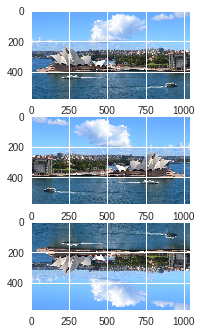

In [0]:
# plot all three images using matplotlib 
pyplot.subplot(311)
pyplot.imshow(image)
pyplot.subplot(312)
pyplot.imshow(hoz_flip)
pyplot.subplot(313)
pyplot.imshow(ver_flip)

### Rotate Image

Additional control such as whether or not to expand the dimensions of the image to fit the rotated pixel values (default is to clip to the same size), where to center the rotation of the image (default is the center), and the fill color for pixels outside of the image (default is black).

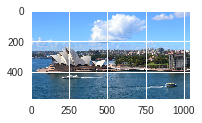

In [0]:
# plot original image
pyplot.subplot(311)
pyplot.imshow(image)

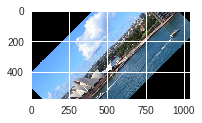

In [0]:
# rotate 45 degrees
pyplot.subplot(312)
pyplot.imshow(image.rotate(45))

The fill color for pixels outside of the image is black by default.

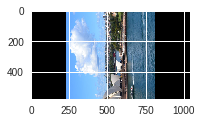

In [0]:
# rotate 90 degrees
pyplot.subplot(313)
pyplot.imshow(image.rotate(90))
pyplot.show()

The pixels are clipped to the original dimensions of the image and that the empty pixels are filled with black color.

### Cropped Image

 A piece can be cut out to create a new image (i.e. cropped).

In [0]:
# create a cropped image
cropped = image.crop((100, 100, 200, 200))

Running the example creates a cropped square image of 100 pixels starting at 100,100 and extending down and left to 200,200. The cropped square is then displayed.

In [0]:
# show cropped image
cropped.show()

In [0]:
!wget http://www.iloveperth.co.kr/upload/smartEditor/20181129121359_6bd8407bf6d5ceee8602.jpg

--2019-04-06 15:59:28--  http://www.iloveperth.co.kr/upload/smartEditor/20181129121359_6bd8407bf6d5ceee8602.jpg
Resolving www.iloveperth.co.kr (www.iloveperth.co.kr)... 218.232.75.188
Connecting to www.iloveperth.co.kr (www.iloveperth.co.kr)|218.232.75.188|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824136 (805K) [image/jpeg]
Saving to: ‘20181129121359_6bd8407bf6d5ceee8602.jpg’

20181129121359_6bd8 100%[===================>] 804.82K   540KB/s    in 1.5s    

2019-04-06 15:59:30 (540 KB/s) - ‘20181129121359_6bd8407bf6d5ceee8602.jpg’ saved [824136/824136]



In [0]:
!mv 20181129121359_6bd8407bf6d5ceee8602.jpg sydney_bridge.jpg

## Sample Image

In [0]:
# load the image
image = Image.open('sydney_bridge.jpg')

In [0]:
# summarize some details about the image 
print(image.format)
print(image.mode)
print(image.size)

JPEG
RGB
(1920, 1281)


### Normalize Pixel Values

To normalize the pixel values so that each pixel value has a value between 0 and 1. It is valid for images to have pixel values in the range 0-1 and images can be viewed normally. This can be achieved by dividing all pixels values by the largest pixel value; that is 255. This is performed across all channels, regardless of the actual range of pixel values that are present in the image. 

In [0]:
# Converts it into a NumPy array
pixels = asarray(image)

In [0]:
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000


In [0]:
# convert from integers to floats
pixels = pixels.astype('float32')

In [0]:
# normalize to the range 0-1
pixels /= 255.0

In [0]:
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Min: 0.000, Max: 1.000


### Center Pixel Values

A data preparation technique for image data is to subtract the mean value from the pixel values. This approach is called centering, as the distribution of the pixel values is centered on the value of zero. Centering can be performed before or after normalization. Centering the pixels then normalizing will mean that the pixel values will be centered close to 0.5 and be in the range 0-1. Centering after normalization will mean that the pixels will have positive and negative values, in which case images will not display correctly (e.g. pixels are expected to have value in the range 0-255 or 0-1).

There are multiple ways that the mean can be calculated; for example:
 Per image.

*   Per image.
*   Per minibatch of images (under stochastic gradient descent).
*   Per training dataset.

The mean can be calculated for all pixels in the image, referred to as a global centering, or it can be calculated for each channel in the case of color images, referred to as local centering.

*   Global Centering: Calculating and subtracting the mean pixel value across color channels.
*    Local Centering: Calculating and subtracting the mean pixel value per color channel.

Per-image global centering is common because it is trivial to implement. Also common is per minibatch global or local centering for the same reason: it is fast and easy to implement.

### Global Centering

Calculate a global mean across all three color channels in the loaded image, then centers the pixel values using the global mean.

In [0]:
# load image
image = Image.open('sydney_bridge.jpg') 
pixels = asarray(image)

In [0]:
# convert from integers to floats
pixels = pixels.astype('float32')

In [0]:
# calculate global mean
mean = pixels.mean()

In [0]:
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Mean: 114.794
Min: 0.000, Max: 255.000


Running the example, we can see that the mean pixel value is about 115.

In [0]:
# global centering of pixels
pixels = pixels - mean

In [0]:
# confirm it had the desired effect
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Mean: -0.000
Min: -114.794, Max: 140.206


### Local Centering

We calculate the mean for each color channel in the loaded image, then centers the pixel values for each channel separately.

In [0]:
# load image
image = Image.open('sydney_bridge.jpg') 
pixels = asarray(image)

In [0]:
# convert from integers to floats
pixels = pixels.astype('float32')

In [0]:
# calculate per-channel means and standard deviations
means = pixels.mean(axis=(0,1), dtype='float64')

print('Means: %s' % means)
print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))

Means: [101.22930003 118.70896476 124.44231679]
Mins: [0. 0. 0.], Maxs: [255. 255. 255.]


In [0]:
# per-channel centering of pixels
pixels -= means


Running the example first reports the mean pixels values for each channel, as well as the min and max values for each channel. The pixel values are centered, then the new means and min/max pixel values across each channel are reported

In [0]:
# confirm it had the desired effect
means = pixels.mean(axis=(0,1), dtype='float64')
print('Means: %s' % means)
print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))

Means: [-6.72902201e-07  1.64739401e-06  1.44365265e-06]
Mins: [-101.2293   -118.70896  -124.442314], Maxs: [153.7707  136.29103 130.55768]


## Standardize Pixel Values

The distribution of pixel values often follows a Normal or Gaussian distribution, this distribution may be present per image, per minibatch of images, or across the training dataset and globally or per channel. There may be benefit in transforming the distribution of pixel values to be a standard Gaussian: that is both centering the pixel values on zero and normalizing the values by the standard deviation. The result is a standard Gaussian of pixel values with a mean of 0.0 and a standard deviation of 1.0.

As with centering, the operation can be performed per image, per minibatch, and across the entire training dataset, and it can be performed globally across channels or locally per channel.

For consistency of the input data, it may make more sense to standardize images per-channel using statistics calculated per minibatch or across the training dataset, if possible.

### Global Standardization

We calculate the mean and standard deviations across all color channels in the loaded image, then uses these values to standardize the pixel values.

In [0]:
# load image
image  = Image.open('sydney_bridge.jpg') 
pixels = asarray(image)

In [0]:
# convert from integers to floats
pixels = pixels.astype('float32')

In [0]:
# calculate global mean and standard deviation
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

Mean: 114.794, Standard Deviation: 74.072


In [0]:
# global standardization of pixels
pixels = (pixels - mean) / std

Running the example first calculates the global mean and standard deviation pixel values, standardizes the pixel values, then confirms the transform by reporting the new global mean and standard deviation of 0.0 and 1.0 respectively.

In [0]:
# confirm it had the desired effect
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

Mean: -0.000, Standard Deviation: 1.000


## Positive Global Standardization

There may be a desire to maintain the pixel values in the positive domain, perhaps so the images can be visualized or perhaps for the benefit of a chosen activation function in the model. A popular way of achieving this is to clip the standardized pixel values to the range [-1, 1] and then rescale the values from [-1,1] to [0,1]. The example below updates the global standardization example to demonstrate this additional rescaling.

In [0]:
# load image
image = Image.open('sydney_bridge.jpg') 
pixels = asarray(image)

In [0]:
# convert from integers to floats 
pixels = pixels.astype('float32')

In [0]:
# calculate global mean and standard deviation
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

Mean: 114.794, Standard Deviation: 74.072


In [0]:
# global standardization of pixels
pixels = (pixels - mean) / std

In [0]:
# clip pixel values to [-1,1]
pixels = clip(pixels, -1.0, 1.0)

In [0]:
# shift from [-1,1] to [0,1] with 0.5 mean
pixels = (pixels + 1.0) / 2.0

Running the example first reports the global mean and standard deviation pixel values; the pixels are standardized then rescaled. Next, the new mean and standard deviation are reported of about 0.5 and 0.3 respectively and the new minimum and maximum values are confirmed of 0.0 and 1.0.

In [0]:
# confirm it had the desired effect
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std)) 
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Mean: 0.486, Standard Deviation: 0.404
Min: 0.000, Max: 1.000


## Local Standardization

We calculate the mean and standard deviation of the loaded image per-channel, then uses these statistics to standardize the pixels separately in each channel.

In [0]:
# load image
image = Image.open('sydney_bridge.jpg') 
pixels = asarray(image)

In [0]:
# convert from integers to floats
pixels = pixels.astype('float32')

In [0]:
# calculate per-channel means and standard deviations 
means = pixels.mean(axis=(0,1), dtype='float64') 
stds = pixels.std(axis=(0,1), dtype='float64')
print('Means: %s, Stds: %s' % (means, stds))

Means: [101.22930003 118.70896476 124.44231679], Stds: [68.75944991 72.01688562 79.07804374]


In [0]:
# per-channel standardization of pixels
pixels = (pixels - means) / stds

Running the example first calculates and reports the means and standard deviation of the pixel values in each channel. The pixel values are then standardized and statistics are re-calculated, confirming the new zero-mean and unit standard deviation.

In [0]:
# confirm it had the desired effect
means = pixels.mean(axis=(0,1), dtype='float64') 
stds = pixels.std(axis=(0,1), dtype='float64') 
print('Means: %s, Stds: %s' % (means, stds))

Means: [-2.26325086e-13  4.61757818e-14  1.22197351e-13], Stds: [1. 1. 1.]


We could investigate and implement data preparation methods that remove linear correlations from the pixel data, such as PCA and ZCA.


In [0]:
!wget https://e3.365dm.com/19/03/1600x900/skynews-bondi-beach-australia_4597706.jpg

--2019-04-06 16:01:48--  https://e3.365dm.com/19/03/1600x900/skynews-bondi-beach-australia_4597706.jpg
Resolving e3.365dm.com (e3.365dm.com)... 8.250.231.252, 8.253.231.252, 8.250.217.252, ...
Connecting to e3.365dm.com (e3.365dm.com)|8.250.231.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 215166 (210K) [image/jpeg]
Saving to: ‘skynews-bondi-beach-australia_4597706.jpg’

skynews-bondi-beach 100%[===================>] 210.12K  --.-KB/s    in 0.02s   

2019-04-06 16:01:48 (9.19 MB/s) - ‘skynews-bondi-beach-australia_4597706.jpg’ saved [215166/215166]



In [0]:
!mv skynews-bondi-beach-australia_4597706.jpg bondi_beach.jpg

In [0]:
# example of loading an image with the Keras API
from keras.preprocessing.image import load_img

In [0]:
# load the image
img = load_img('bondi_beach.jpg', 
               grayscale=False,
               color_mode='rgb'
              )

In [0]:
# report details about the image 
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(1600, 900)


We can verifty that the image was loaded as a PIL image in JPEG format with RGB channels and the size of 1600 by 900 pixels.

In [0]:
# show the image
img.show()

### Convert an Image With Keras


In [0]:
# example of converting an image with the Keras API
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.preprocessing.image import array_to_img

In [0]:
# load the image
img = load_img('bondi_beach.jpg')
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [0]:
# convert to numpy array
img_array = img_to_array(img) 
print(img_array.dtype)        
print(img_array.shape)

float32
(900, 1600, 3)


converted to the array format [height, width, channels].

In [0]:
# convert back to image
img_pil = array_to_img(img_array)
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


### Save an Image With Keras

In [0]:
# example of saving an image with the Keras API
from keras.preprocessing.image import save_img

In [0]:
# load image as as grayscale
img = load_img('bondi_beach.jpg', color_mode='grayscale')

In [0]:
# convert image to a numpy array
img_array = img_to_array(img)

In [0]:
# save the image with a new filename 
save_img('bondi_beach_grayscale.jpg', img_array)

In [0]:
# load the image to confirm it was saved correctly
img = load_img('bondi_beach_grayscale.jpg')

In [0]:
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

<class 'PIL.Image.Image'>
None
RGB
(1600, 900)


In [0]:
img.show()

## Scale Image Pixel Data with Keras

The pixel values in images must be scaled prior to providing the images as input to a deep learning neural network model during the training or evaluation of the model. We can scale the images using a preferred scaling technique just-in-time during the training or model evaluation process.

### MNIST Handwritten Image Classification Dataset

The MNIST problem, is an image classification problem comprised of 70,000 images of handwritten digits. The goal of the problem is to classify a given image of a handwritten digit as an integer from 0 to 9. As such, it is a multiclass image classification problem.

In [0]:
# example of loading the MNIST dataset
from keras.datasets import mnist

In [0]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
# summarize dataset shape
print('Train', train_images.shape, train_labels.shape)
print('Test', (test_images.shape, test_labels.shape))

Train (60000, 28, 28) (60000,)
Test ((10000, 28, 28), (10000,))


In [0]:
# summarize pixel values
print('Train (min, max, mean)', train_images.min(), train_images.max(), train_images.mean(),train_images.std())
print('Train (min, max, mean)', test_images.min(), test_images.max(), test_images.mean(), test_images.std())

Train (min, max, mean) 0 255 33.318421449829934 78.56748998339798
Train (min, max, mean) 0 255 33.791224489795916 79.17246322228644


We can see that all images are 28 by 28 pixels with a single channel for black-and-white images. There are 60,000 images for the training dataset and 10,000 for the test dataset. We can also see that pixel values are integer values between 0 and 255 and that the mean and standard deviation of the pixel values are similar between the two datasets.


### ImageDataGenerator for Pixel Scaling
The ImageDataGenerator class supports a number of pixel scaling methods, as well as a range of data augmentation techniques. 

Pixel standardization is supported at two levels: either per-image (called sample-wise) or per-dataset (called feature-wise). Specifically, just the mean, or the mean and standard deviation statistics required to standardize pixel values can be calculated from the pixel values in each image only (sample-wise) or across the entire training dataset (feature-wise).

In [0]:
# example of normalizing a image dataset
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

In [0]:
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1

trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX  = testX.reshape((testX.shape[0],   width, height, channels))

trainX.shape[0] for index 0 corresponds to the number of samples in the training dataset.

In [0]:
# confirm scale of pixels
print('Train min=%.3f, max=%.3f' % (trainX.min(), trainX.max()))
print('Test min=%.3f, max=%.3f'  % (testX.min(), testX.max()))

Train min=0.000, max=255.000
Test min=0.000, max=255.000


In [0]:
# create generator (1.0/255.0 = 0.003921568627451)
datagen = ImageDataGenerator(rescale=1.0/255.0)

Note: there is no need to fit the generator in this case.

In [0]:
# prepare a iterators to scale images (get batch iterator)
train_iterator = datagen.flow(trainX, trainY, batch_size=64)
test_iterator  = datagen.flow(testX,  testY,  batch_size=64)

print('Number of batches train=%d, test=%d '% (len(train_iterator), len(test_iterator)))

Number of batches train=938, test=157 


In [0]:
# confirm the scaling works
batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(64, 28, 28, 1), min=0.000, max=1.000


### Center Images With ImageDataGenerator

Pixel scaling method is to calculate the mean pixel value across the entire training dataset, then subtract it from each image.

In [0]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

In [0]:
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX  = testX.reshape((testX.shape[0],   width, height, channels))

In [0]:
# report per-image mean
print('Means train=%.3f, test=%.3f' % (trainX.mean(), testX.mean()))

Means train=33.318, test=33.791


In [0]:
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True)

In [0]:
# calculate the mean on the training dataset
datagen.fit(trainX)
print('Data Generator Mean: %.3f' % datagen.mean)

Data Generator Mean: 33.318


In [0]:
# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=64)

In [0]:
# get a batch
batchX, batchy = iterator.next()

In [0]:
# mean pixel value in the batch
print(batchX.shape, batchX.mean())

(64, 28, 28, 1) -1.4972187


In [0]:
# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

In [0]:
# get a batch
batchX, batchy = iterator.next()

In [0]:
# mean pixel value in the batch
print(batchX.shape, batchX.mean())

(60000, 28, 28, 1) -1.9512918e-05


### Standardize Images With ImageDataGenerator

Standardization is a data scaling technique that assumes that the distribution of the data is Gaussian and shifts the distribution of the data to have a mean of zero and a standard deviation of one.

It can be beneficial when training neural networks as the dataset sums to zero and the inputs are small values in the rough range of about -3.0 to 3.0 (e.g. 99.7 of the values will fall within three standard deviations of the mean). Standardization of images is achieved by subtracting the mean pixel value and dividing the result by the standard deviation of the pixel values.

In [0]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

In [0]:
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))

In [0]:
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)'% (trainX.mean(), trainX.std(),
    testX.mean(), testX.std()))

Statistics train=33.318 (78.567), test=33.791 (79.172)


In [0]:
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [0]:
# calculate the mean on the training dataset
datagen.fit(trainX)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

Data Generator mean=33.318, std=78.567


In [0]:
# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=64)

In [0]:
# get a batch
batchX, batchy = iterator.next()

In [0]:
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

(64, 28, 28, 1) -0.0046208915 0.9932051


In [0]:
# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

In [0]:
# get a batch
batchX, batchy = iterator.next()

In [0]:
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

(60000, 28, 28, 1) -3.4560264e-07 0.9999998


## Dataset Directory Structure

There is a standard way to lay out your image data for modeling.


**Example of dataset directory structure for binary classification task:**

data/

data/train/

data/train/class_1/

data/train/class_2/

data/test/

data/test/class_1/

data/test/class_2/

data/validation/

data/validation/class_1/

data/validation/class_2/



In [0]:
!wget https://machinelearningmastery.com/wp-content/uploads/2019/01/red_car_01.jpg
!wget https://machinelearningmastery.com/wp-content/uploads/2019/01/blue_car_01.jpg

--2019-04-06 16:03:58--  https://machinelearningmastery.com/wp-content/uploads/2019/01/red_car_01.jpg
Resolving machinelearningmastery.com (machinelearningmastery.com)... 35.196.45.101
Connecting to machinelearningmastery.com (machinelearningmastery.com)|35.196.45.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220294 (215K) [image/jpeg]
Saving to: ‘red_car_01.jpg.1’

red_car_01.jpg.1    100%[===================>] 215.13K   806KB/s    in 0.3s    

2019-04-06 16:03:59 (806 KB/s) - ‘red_car_01.jpg.1’ saved [220294/220294]

--2019-04-06 16:04:01--  https://machinelearningmastery.com/wp-content/uploads/2019/01/blue_car_01.jpg
Resolving machinelearningmastery.com (machinelearningmastery.com)... 35.196.45.101
Connecting to machinelearningmastery.com (machinelearningmastery.com)|35.196.45.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107324 (105K) [image/jpeg]
Saving to: ‘blue_car_01.jpg.1’

blue_car_01.jpg.1   100%[===============

In [0]:
!mkdir -p data/train/red/
!mkdir -p data/test/red/
!mkdir -p data/validation/red/
!mkdir -p data/train/blue/
!mkdir -p data/test/blue/
!mkdir -p data/validation/blue/

In [0]:
!cp red_car_01.jpg data/train/red/
!cp red_car_01.jpg data/test/red/
!cp red_car_01.jpg data/validation/red/

In [0]:
!cp blue_car_01.jpg data/train/blue/
!cp blue_car_01.jpg data/test/blue/
!cp blue_car_01.jpg data/validation/blue/

Now that we have a basic directory structure.

In [0]:
# example of progressively loading images from file
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# create generator
datagen = ImageDataGenerator() # creates an instance  with all of the default configuration

Create three iterators, one for each of the train, validation, and test binary classification datasets. As each iterator is created, we can see debug messages reporting the number of images and classes discovered and prepared.

The target size argument that allows to load all images to a specific size, which is often required when modeling. The function defaults to square images with the size (256, 256).

In [0]:
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('data/train/',      class_mode='binary', classes=['blue', 'read'], batch_size=64)
val_it   = datagen.flow_from_directory('data/validation/', class_mode='binary', classes=['blue', 'read'], batch_size=64) 
test_it  = datagen.flow_from_directory('data/test/',       class_mode='binary', classes=['blue', 'read'], batch_size=64)

Found 1 images belonging to 2 classes.
Found 1 images belonging to 2 classes.
Found 1 images belonging to 2 classes.


The first batch of images is retrieved and we can confirm that the batch contains two images, as only two images were available. We can also confirm that the images were loaded and forced to the square dimensions of 256 rows and 256 columns of pixels and the pixel data was not scaled and remains in the range [0, 255].

the function in alphabetical order and assigned an integer for each class. The subdirectory blue comes before red alphabetically, therefore the class labels are assigned the integers: blue=0, red=1.



In [0]:
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(1, 256, 256, 3), min=0.000, max=255.000


## Image Data Augmentation

Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset, such as to shift, flip, brightness, and zoom image data augmentation.

We will focus on five main types of data augmentation techniques for image data:

- Image shifts via the width shift range and height shift range arguments.
- Image flips via the horizontal flip and vertical flip arguments.
- Image rotations via the rotation range argument
- Image brightness via the brightness range argument.
- Image zoom via the zoom range argument.

In [0]:
!wget https://machinelearningmastery.com/wp-content/uploads/2019/01/bird.jpg

--2019-04-06 16:05:14--  https://machinelearningmastery.com/wp-content/uploads/2019/01/bird.jpg
Resolving machinelearningmastery.com (machinelearningmastery.com)... 35.196.45.101
Connecting to machinelearningmastery.com (machinelearningmastery.com)|35.196.45.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77530 (76K) [image/jpeg]
Saving to: ‘bird.jpg.1’

bird.jpg.1          100%[===================>]  75.71K  --.-KB/s    in 0.1s    

2019-04-06 16:05:15 (568 KB/s) - ‘bird.jpg.1’ saved [77530/77530]



### Horizontal and Vertical Shift Augmentation

A shift to an image means moving all pixels of the image in one direction, such as horizontally or vertically, while keeping the image dimensions the same. This means that some of the pixels will be clipped off the image and there will be a region of the image where new pixel values will have to be specified. 

A value in the range between no shift and the percentage or number of pixels will be sampled for each image and the shift performed, e.g. [0, value]

In [0]:
# example of horizontal shift image augmentation
from numpy import expand_dims

In [0]:
# load the image
img = load_img('bird.jpg')

In [0]:
# convert to numpy array
data = img_to_array(img)

In [0]:
# expand dimension to one sample
samples = expand_dims(data, 0)

In [0]:
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])

In [0]:
# prepare iterator
it = datagen.flow(samples, batch_size=1)

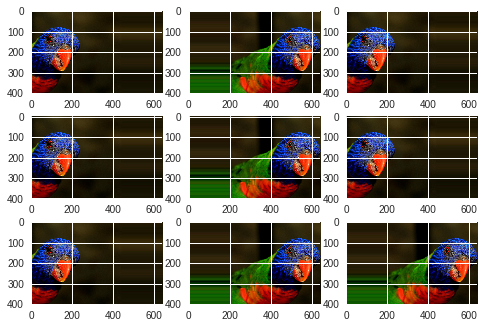

In [0]:
# generate samples and plot
for i in range(9):
  
  # define subplot
  pyplot.subplot(330 + 1 + i)
  
  # generate batch of images
  batch = it.next()
  
  # convert to unsigned integers for viewing 
  image = batch[0].astype('uint32')
  
  # plot raw pixel data 
  pyplot.imshow(image)
  
# show the figure
pyplot.show()

We can see in the plot of the result that a range of different randomly selected positive and negative horizontal shifts was performed and the pixel values at the edge of the image are duplicated to fill in the empty part of the image created by the shift.

Example below updated to perform vertical shifts of the image via the height shift range argument, in this case specifying the percentage of the image to shift as 0.5 the height of the image.

In [0]:
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)

In [0]:
# prepare iterator
it = datagen.flow(samples, batch_size=1)

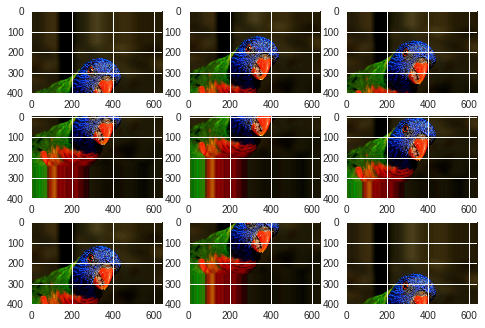

In [0]:
# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing 
  image = batch[0].astype('uint32')
  
  # plot raw pixel data 
  pyplot.imshow(image)
  
# show the figure
pyplot.show()

Running the example creates a plot of images augmented with random positive and negative vertical shifts. 

### Random Rotation Augmentation

A rotation augmentation randomly rotates the image clockwise by a given number of degrees from 0 to 360. The rotation will likely rotate pixels out of the image frame and leave areas of the frame with no pixel data that must be filled in. 

In [0]:
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)

In [0]:
# prepare iterator
it = datagen.flow(samples, batch_size=1)

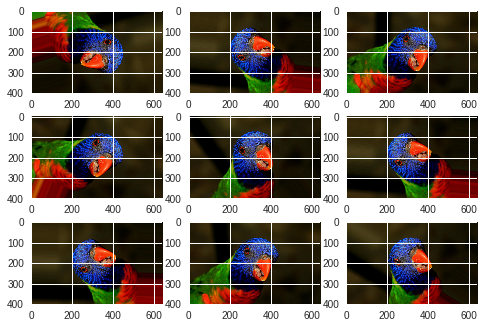

In [0]:
# generate samples and plot
for i in range(9):
  
  # define subplot
  pyplot.subplot(330 + 1 + i)
  
  # generate batch of images
  batch = it.next()
  
  # convert to unsigned integers for viewing 
  image = batch[0].astype('uint32')
  
  # plot raw pixel data 
  pyplot.imshow(image)
  
# show the figure
pyplot.show()

### Random Brightness Augmentation

The brightness of the image can be augmented by either randomly darkening images, brightening images, or both. The intent is to allow a model to generalize across images trained on different lighting levels. 

The example below demonstrates a brightness image augmentation, allowing the generator to randomly darken the image between 1.0 (no change) and 0.2 or 20%.

In [0]:
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])

In [0]:
# prepare iterator
it = datagen.flow(samples, batch_size=1)

Running the example shows the augmented images with varying amounts of darkening applied.

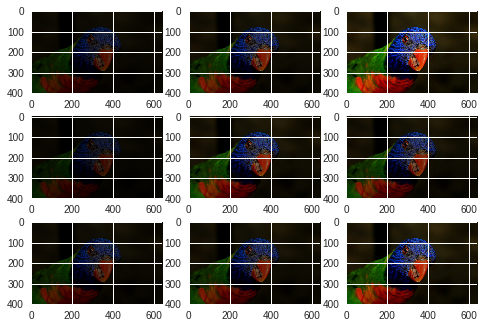

In [154]:
# generate samples and plot
for i in range(9):

  # define subplot
  pyplot.subplot(330 + 1 + i)
  
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing 
  image = batch[0].astype('uint32')
  
  # plot raw pixel data 
  pyplot.imshow(image)
  
# show the figure
pyplot.show()

### Random Zoom Augmentation

A zoom augmentation randomly zooms the image and either adds new pixel values around the image or interpolates pixel values respectively.

We can specify the percentage of the zoom as a single float or a range as an array or tuple. If a float is specified, then the range for the zoom will be [1-value, 1+value]. For example, if you specify 0.3, then the range will be [0.7, 1.3], or between 70% (zoom in) and 130% (zoom out). The zoom amount is uniformly randomly sampled from the zoom region for each dimension (width, height) separately.

**Note** that zoom values less than 1.0 will zoom the image in, e.g. [0.5,0.5] makes the object in the image 50% larger or closer, and values larger than 1.0 will zoom the image out by 50%, e.g. [1.5, 1.5] makes the object in the image smaller or further away. A zoom of [1.0,1.0] has no effect.

In [0]:
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])

In [0]:
# prepare iterator
it = datagen.flow(samples, batch_size=1)

Running the example generates examples of the zoomed image, showing a random zoom in that is different on both the width and height dimensions that also randomly changes the aspect ratio of the object in the image.

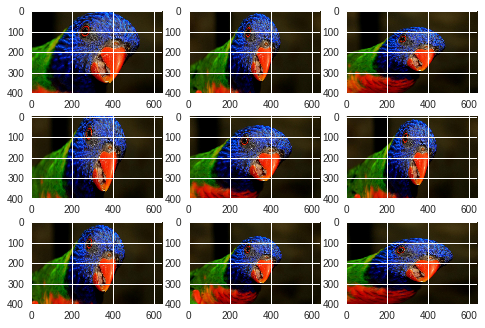

In [157]:
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  
  # generate batch of images
  batch = it.next()
  
  # convert to unsigned integers for viewing 
  image = batch[0].astype('uint32')
  
  # plot raw pixel data 
  pyplot.imshow(image)
  
# show the figure
pyplot.show()